In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [3]:
np.random.seed(12)

In [4]:
# Зададим N равное 300
N = 300

In [5]:
X = np.linspace(-2, 2, N)
eps = np.random.normal(scale=0.3, size=N)
y = 6 * np.cos(1.5 * np.sin(X)) + X ** 4 + eps

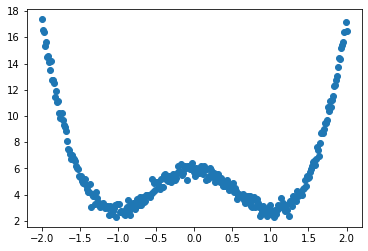

In [6]:
plt.plot(X, y, 'o');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [8]:
df_train = pd.DataFrame({'y': y_train, 'x': X_train})
df_test = pd.DataFrame({'y': y_test, 'x': X_test})

Пороговое значение MSE равное 0.01 в задании оказалось слишком маленьким для того, чтобы остановить обучение модели -- даже для больших полиномов значение MSE на обучающей выборке не достигалось. Наверное, это произошло из-за слишком высокого значения СКО сгенерированного "белого шума". В связи с этим, пороговым значением было установлено 0.1.

In [9]:
model = smf.ols(f'y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6)', data=df_train).fit()
print(f'MSE на обучающей выборке составило {np.round(mse(df_train.y, model.fittedvalues), 4)}')
print(model.summary())

MSE на обучающей выборке составило 0.1
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     4873.
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          8.92e-242
Time:                        11:03:00   Log-Likelihood:                -64.257
No. Observations:                 240   AIC:                             142.5
Df Residuals:                     233   BIC:                             166.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    

In [10]:
y_pred = model.predict(exog=dict(x=X))
y_pred_train = model.predict(exog=dict(x=X_train))
y_pred_test = model.predict(exog=dict(x=X_test))

In [11]:
print(f'MSE на обучающей выборке составило {np.round(mse(y_train, y_pred_train), 4)}')
print(f'MSE на обучающей выборке составило {np.round(mse(y_test, y_pred_test), 4)}')

MSE на обучающей выборке составило 0.1
MSE на обучающей выборке составило 0.1057


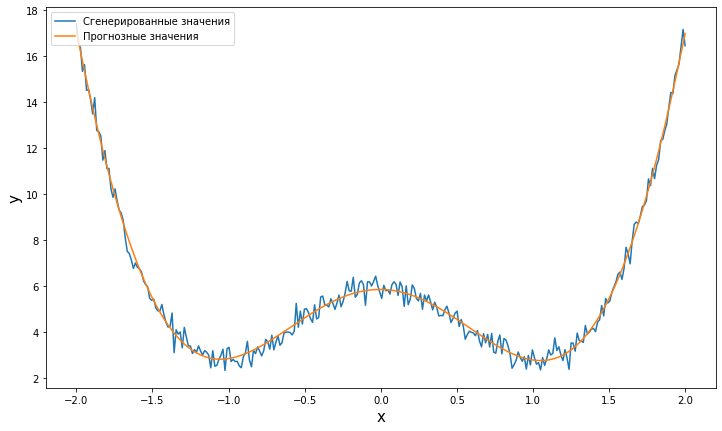

In [12]:
fig1, ax1 = plt.subplots(figsize = (12, 7))
ax1.plot(X, y, label = 'Сгенерированные значения')
ax1.plot(X, y_pred, label = 'Прогнозные значения')
ax1.set_xlabel('x', size = 15)
ax1.set_ylabel('y', size = 15)
ax1.legend(loc = 'upper left')
plt.show();